In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use('seaborn-deep')
plt.style.use("seaborn-darkgrid")

In [3]:
df = pd.read_csv('../data/train.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


In [4]:
df.drop('id', axis=1, inplace=True)
new_columns = ['weight', 'quality', 'color', 'clarity', 'depth_percent', 'table_percent', 'x', 'y', 'z', 'price']
df.columns = new_columns
df['depth_percent'] = df['depth_percent'] / 100
df['table_percent'] = df['table_percent'] / 100
df.drop(df.loc[df['x'] == 0].index, inplace=True) #drop rows with x = 0
df.drop(df.loc[df['y'] == 0].index, inplace=True) #drop rows with y = 0
df.drop(df.loc[df['z'] == 0].index, inplace=True) #drop rows with z = 0
df['volume'] = df['x'] * df['y'] * df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

#remove duplicated rows rounded to 2 decimal places [weight, price]
#round_duplicated = df.drop(['table_percent', 'depth_percent'], axis=1)
#round_duplicated['price'] = round_duplicated['price'].round(2)
#print(round_duplicated.duplicated().sum(), 'duplicated rows by round(2)')
#round_duplicated = round_duplicated.loc[round_duplicated.duplicated() == True]
#df.drop(round_duplicated.index, axis=0, inplace=True)

#apply log to price and volume
#df.price = np.log(df.price)
#df.volume = np.log10(df.volume)

#split categorical and numerical variables
col_num = df.select_dtypes(include = np.number).columns
col_cat = df.select_dtypes(include = 'object').columns
print('numerical columns:', col_num)
print('categorical columns:', col_cat)
print('numerical shape:', df.shape)
df.sample(5)

numerical columns: Index(['weight', 'depth_percent', 'table_percent', 'price', 'volume'], dtype='object')
categorical columns: Index(['quality', 'color', 'clarity'], dtype='object')
numerical shape: (40438, 8)


,weight,quality,color,clarity,depth_percent,table_percent,price,volume
10219,0.71,Very Good,G,VS1,0.633,0.59,7.926,109.004544
30610,1.01,Very Good,I,SI1,0.588,0.58,8.191,164.920140
33318,0.31,Ideal,H,VS2,0.612,0.59,6.244,51.413120
24349,0.57,Fair,E,VVS1,0.587,0.66,7.939,91.627992
33096,0.72,Premium,G,SI1,0.612,0.62,7.702,115.443900


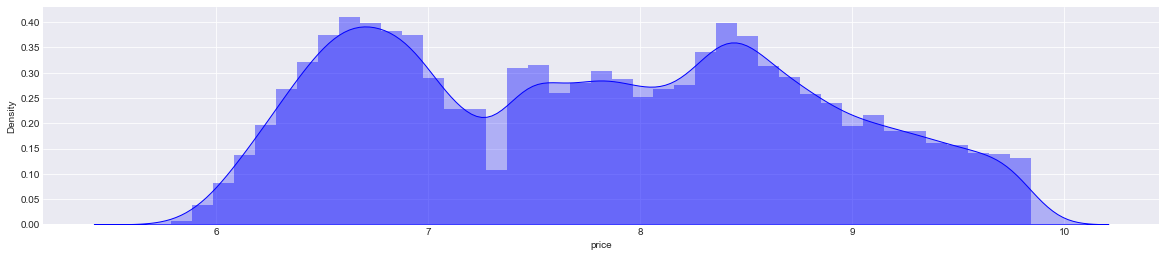

In [5]:
#plot response variable distribution
fig, axes = plt.subplots(figsize = (20, 4))
sns.distplot(df.price, hist = True, color = "blue", kde_kws = {"shade": True, "linewidth": 1});

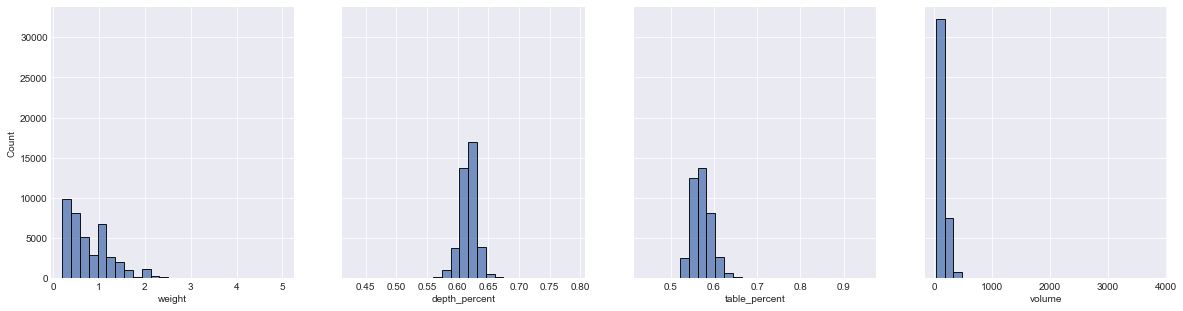

In [6]:
#plot numerical variables distribution
fig, ax = plt.subplots(1, 4, figsize = (20,5), sharey=True)
ax = ax.flat
df_num = df[col_num.drop('price')]
counter = 0
for i in df_num.columns:
    sns.histplot(df_num[i], kde = False, ax = ax[counter], bins=25)
    counter += 1
plt.show();

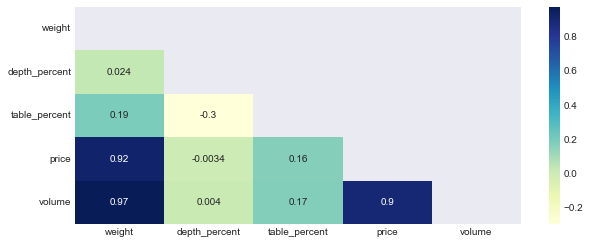

In [7]:
#headmap corr plot
fig, axes = plt.subplots(figsize = (10, 4))
mask = np.triu(np.ones_like(df[col_num].corr(), dtype = np.bool))
sns.heatmap(df[col_num].corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

price vs depth_percent have no correlation


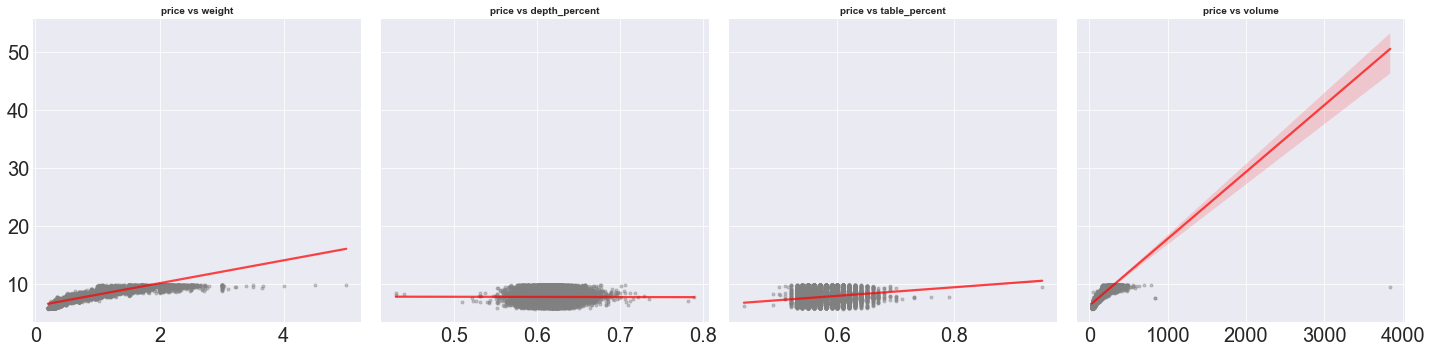

In [8]:
#plotteamos correlaciones entre variables predictoras y respuesta
fig, axes = plt.subplots(1, 4, figsize = (20,5), sharey=True)
axes = axes.flat
for i, colum in enumerate(df_num.columns):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"price vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();
print('price vs depth_percent have no correlation')

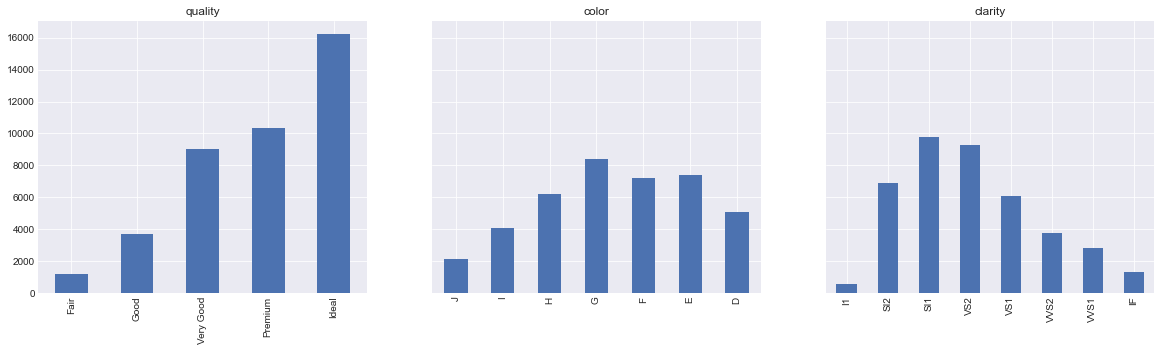

In [9]:
#plot categorical variables distribution
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
counter = 0
for i in df[col_cat].columns:
    df[i].value_counts().loc[mapping[i]].plot.bar(ax=ax[counter]).set_title(i)
    counter += 1
plt.show();    

In [10]:
df.describe(include='all').T.sort_values(by='unique', ascending=True)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
quality,40438,5,Ideal,16228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,40438,7,G,8405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,40438,8,SI1,9777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,40438.0,NaN,NaN,NaN,0.797276,0.475643,0.2,0.4,0.7,1.04,5.01
depth_percent,40438.0,NaN,NaN,NaN,0.617463,0.014366,0.43,0.61,0.618,0.625,0.79
table_percent,40438.0,NaN,NaN,NaN,0.574515,0.022344,0.44,0.56,0.57,0.59,0.95
price,40438.0,NaN,NaN,NaN,7.783371,1.016666,5.787,6.851,7.779,8.58,9.842
volume,40438.0,NaN,NaN,NaN,129.875273,79.108381,31.707984,64.967856,114.628782,170.79126,3840.59806


In [11]:
#export to csv
df.to_csv('../data/train_data_cleaned.csv', index=False)